In [0]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
import random
from keras.layers.core import Dense, Activation, Dropout
from keras.models import load_model

### 整理資料 ###
import numpy as np

# import資料
# x為數字的值(60000,28,28)，y為lable(60000,)
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 資料重新reshape並標準化
x_train = x_train.reshape(x_train.shape[0], -1)/ 255. # reshape 60000列，行自動分配
y_train = np_utils.to_categorical(y_train, num_classes=10)
x_test = x_test.reshape(x_test.shape[0], -1)/ 255.
y_test = np_utils.to_categorical(y_test, num_classes=10)

# 建立model
model = Sequential()
model.add(Dense(32,input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# 優化器設定
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# 激活model
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train model
# 以32個batch為一組進行迭代訓練，進行兩次訓練
print('-------train-------')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# test model 查看精準度
print('\n-------test-------')
loss, accuracy = model.evaluate(x_test, y_test)
print('loss =', loss)
print('accuracy =', accuracy)

-------train-------
Epoch 1/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3439 - acc: 0.9049
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1956 - acc: 0.9437
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1597 - acc: 0.9536
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1399 - acc: 0.9595
Epoch 5/10
38240/60000 [==================>...........] - ETA: 1s - loss: 0.1234 - acc: 0.9649

60000/60000 [==============================] - 4s 60us/step - loss: 0.1266 - acc: 0.9642
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1177 - acc: 0.9667
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1104 - acc: 0.9681
Epoch 8/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1039 - acc: 0.9709
Epoch 9/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.0989 - acc: 0.9726

60000/60000 [==============================] - 4s 60us/step - loss: 0.0987 - acc: 0.9727
Epoch 10/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0937 - acc: 0.9746

-------test-------
10000/10000 [==============================] - 1s 73us/step
('loss =', 0.14134071285759564)
('accuracy =', 0.9615)


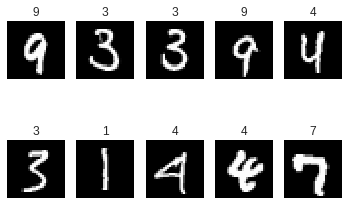

In [0]:
y_predict = model.predict_classes(x_test, verbose=0)
x_test_data = x_test.reshape(x_test.shape[0],28,28)

start = random.randint(0,9991)
for i in range(start, start+10):
    plt.subplot(2,5,i-start+1)
    plt.imshow(x_test_data[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.title(y_predict[i]);